<a href="https://colab.research.google.com/github/rodrigorhoads/IADEV/blob/main/Machine_Learning_Avan%C3%A7ado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from google.colab import data_table
from sklearn.preprocessing import LabelEncoder
data_table.enable_dataframe_formatter()

In [3]:
pd.set_option('display.max_columns', None)
db = pd.read_csv('HR_Abandono.csv',sep=';')
db.head()

,id,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto
0,1,"0,38","0,53",157,3,0,1,0,low,2,sales
1,2,"0,8","0,86",262,6,0,1,0,medium,5,sales
2,3,"0,11","0,88",272,4,0,1,0,medium,6,sales
3,4,"0,72","0,87",223,5,0,1,0,low,5,sales
4,5,"0,37","0,52",159,3,0,1,0,low,2,sales


In [ ]:
db.tail()

,id,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto
14994,14995,"0,4","0,57",151,3,0,1,0,low,2,support
14995,14996,"0,37","0,48",160,3,0,1,0,low,2,support
14996,14997,"0,37","0,53",143,3,0,1,0,low,2,support
14997,14998,"0,11","0,96",280,4,0,1,0,low,6,support
14998,14999,"0,37","0,52",158,3,0,1,0,low,2,support


In [ ]:
db.shape

(14999, 11)

In [ ]:
db.describe()

,id,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,num_project
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,201.083672,3.407027,0.144610,0.238083,0.021268,3.785986
std,4329.982679,50.182121,1.176120,0.351719,0.425924,0.144281,1.194539
min,1.000000,96.000000,2.000000,0.000000,0.000000,0.000000,2.000000
25%,3750.500000,156.000000,3.000000,0.000000,0.000000,0.000000,3.000000
50%,7500.000000,200.000000,3.000000,0.000000,0.000000,0.000000,4.000000
75%,11249.500000,245.000000,4.000000,0.000000,0.000000,0.000000,5.000000
max,14999.000000,810.000000,6.000000,1.000000,1.000000,1.000000,6.000000


In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     14999 non-null  int64 
 1   satisfaction_level     14999 non-null  object
 2   last_evaluation        14999 non-null  object
 3   average_montly_hours   14999 non-null  int64 
 4   time_spend_company     14999 non-null  int64 
 5   Work_accident          14999 non-null  int64 
 6   left                   14999 non-null  int64 
 7   promotion_last_5years  14999 non-null  int64 
 8   salary                 14999 non-null  object
 9   num_project            14999 non-null  int64 
 10  depto                  14999 non-null  object
dtypes: int64(7), object(4)
memory usage: 1.3+ MB


Validando se existem colunas com valores nulos

In [ ]:
db.isnull().sum()

,0
id,0
satisfaction_level,0
last_evaluation,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
salary,0
num_project,0


Validando se existem linhas com valores duplicados

In [ ]:
db.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
14994,False
14995,False
14996,False
14997,False


In [ ]:
qtd_duplicado=db.duplicated().sum()
qtd_duplicado

np.int64(0)

Analisando os dados com gráficos

Analisando se os valores de números de acidentes comparado ao tempo gasto na companhia

<ipython-input-4-7fdfafc7141a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='Work_accident', y= 'time_spend_company', data=db, palette='hls')


<Axes: xlabel='Work_accident', ylabel='time_spend_company'>

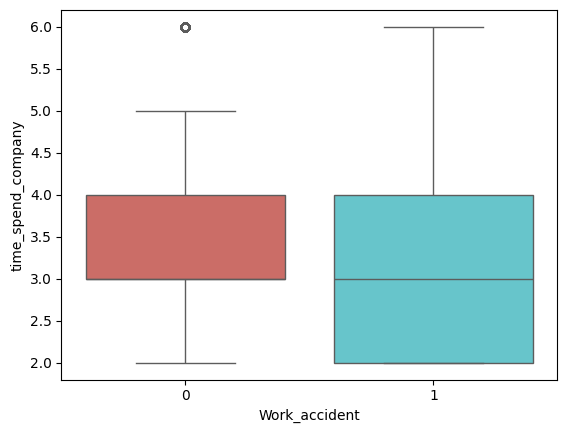

In [4]:
import seaborn as sb
sb.boxplot(x='Work_accident', y= 'time_spend_company', data=db, palette='hls')

<Axes: xlabel='time_spend_company', ylabel='Count'>

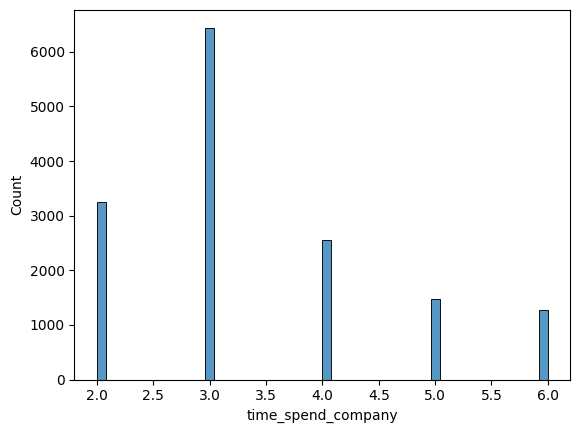

In [ ]:
sb.histplot(x='time_spend_company',data=db)

<ipython-input-25-dfe3cf8ec473>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='Work_accident', y= 'average_montly_hours', data=db, palette='hls')


<Axes: xlabel='Work_accident', ylabel='average_montly_hours'>

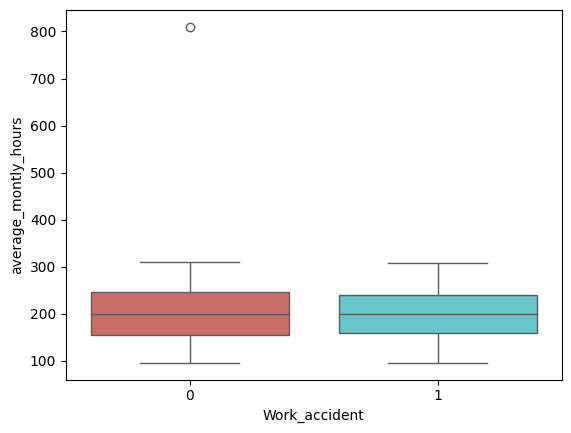

In [ ]:
sb.boxplot(x='Work_accident', y= 'average_montly_hours', data=db, palette='hls')

<Axes: xlabel='average_montly_hours', ylabel='Count'>

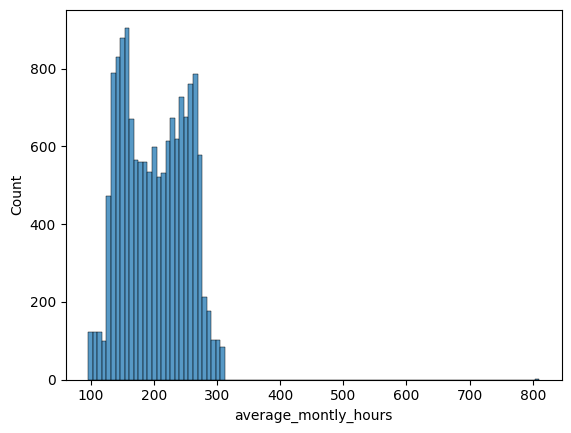

In [ ]:
sb.histplot(x='average_montly_hours',data=db)

<ipython-input-29-b370ff34ac84>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='promotion_last_5years', y= 'left', data=db, palette='hls')


<Axes: xlabel='promotion_last_5years', ylabel='left'>

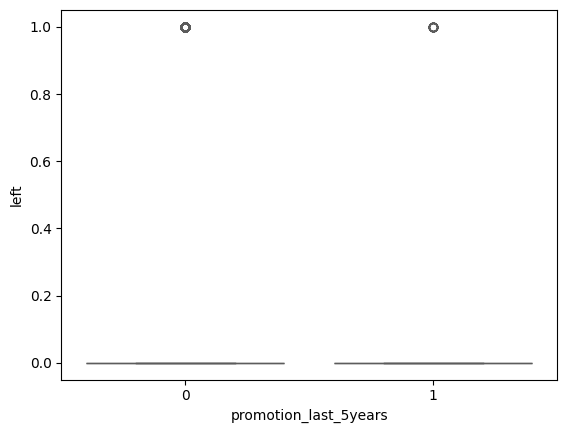

In [ ]:
sb.boxplot(x='promotion_last_5years', y= 'left', data=db, palette='hls')

Vamos tratar as colunas que possuem dados categoricos

In [ ]:
db.head()

,id,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto
0,1,"0,38","0,53",157,3,0,1,0,low,2,sales
1,2,"0,8","0,86",262,6,0,1,0,medium,5,sales
2,3,"0,11","0,88",272,4,0,1,0,medium,6,sales
3,4,"0,72","0,87",223,5,0,1,0,low,5,sales
4,5,"0,37","0,52",159,3,0,1,0,low,2,sales


In [ ]:
db.salary.value_counts()

,count
salary,
low,7316
medium,6446
high,1237


In [ ]:
db.depto.value_counts()

,count
depto,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


Vamos usar o label encoded para tratar a variável salary pois ela tem uma ordem natural e vamos usar o one hot encodeded para tratar a variável depto

In [5]:
from sklearn.preprocessing import OrdinalEncoder
dummy_depto=pd.get_dummies(db['depto'], prefix='depto',dtype=int)

dados_coeded = pd.concat([db,dummy_depto],axis=1)
odEncoder = OrdinalEncoder(categories=[['low','medium','high']])
dados_coeded['salary_encoded'] = odEncoder.fit_transform(db[['salary']])
dados_coeded.drop(['depto'],axis=1, inplace=True)
dados_coeded.drop(['salary'],axis=1, inplace=True)
dados_coeded.head()


,id,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,num_project,depto_IT,depto_RandD,depto_accounting,depto_hr,depto_management,depto_marketing,depto_product_mng,depto_sales,depto_support,depto_technical,salary_encoded
0,1,"0,38","0,53",157,3,0,1,0,2,0,0,0,0,0,0,0,1,0,0,0.0
1,2,"0,8","0,86",262,6,0,1,0,5,0,0,0,0,0,0,0,1,0,0,1.0
2,3,"0,11","0,88",272,4,0,1,0,6,0,0,0,0,0,0,0,1,0,0,1.0
3,4,"0,72","0,87",223,5,0,1,0,5,0,0,0,0,0,0,0,1,0,0,0.0
4,5,"0,37","0,52",159,3,0,1,0,2,0,0,0,0,0,0,0,1,0,0,0.0


In [ ]:
dados_coeded.salary_encoded.value_counts()

,count
salary_encoded,
0.0,7316
1.0,6446
2.0,1237


In [ ]:
dados_coeded.describe()

,id,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,num_project,salary_encoded,depto_IT,depto_RandD,depto_accounting,depto_hr,depto_management,depto_marketing,depto_product_mng,depto_sales,depto_support,depto_technical
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,201.083672,3.407027,0.144610,0.238083,0.021268,3.785986,0.594706,0.081805,0.052470,0.051137,0.049270,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345
std,4329.982679,50.182121,1.176120,0.351719,0.425924,0.144281,1.194539,0.637183,0.274077,0.222981,0.220284,0.216438,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317
min,1.000000,96.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3750.500000,156.000000,3.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7500.000000,200.000000,3.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11249.500000,245.000000,4.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,14999.000000,810.000000,6.000000,1.000000,1.000000,1.000000,6.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As colunas 'satisfaction_level' e 'last_evaluation' parecem que não são numéricas vamos converte-las

In [6]:
import numpy as np

dados_coeded['satisfaction_level'] = dados_coeded['satisfaction_level'].str.replace(',', '.').astype(float)
dados_coeded['last_evaluation'] = dados_coeded['last_evaluation'].str.replace(',', '.').astype(float)

Agora vamos tirar uma matriz de correlação

<Axes: >

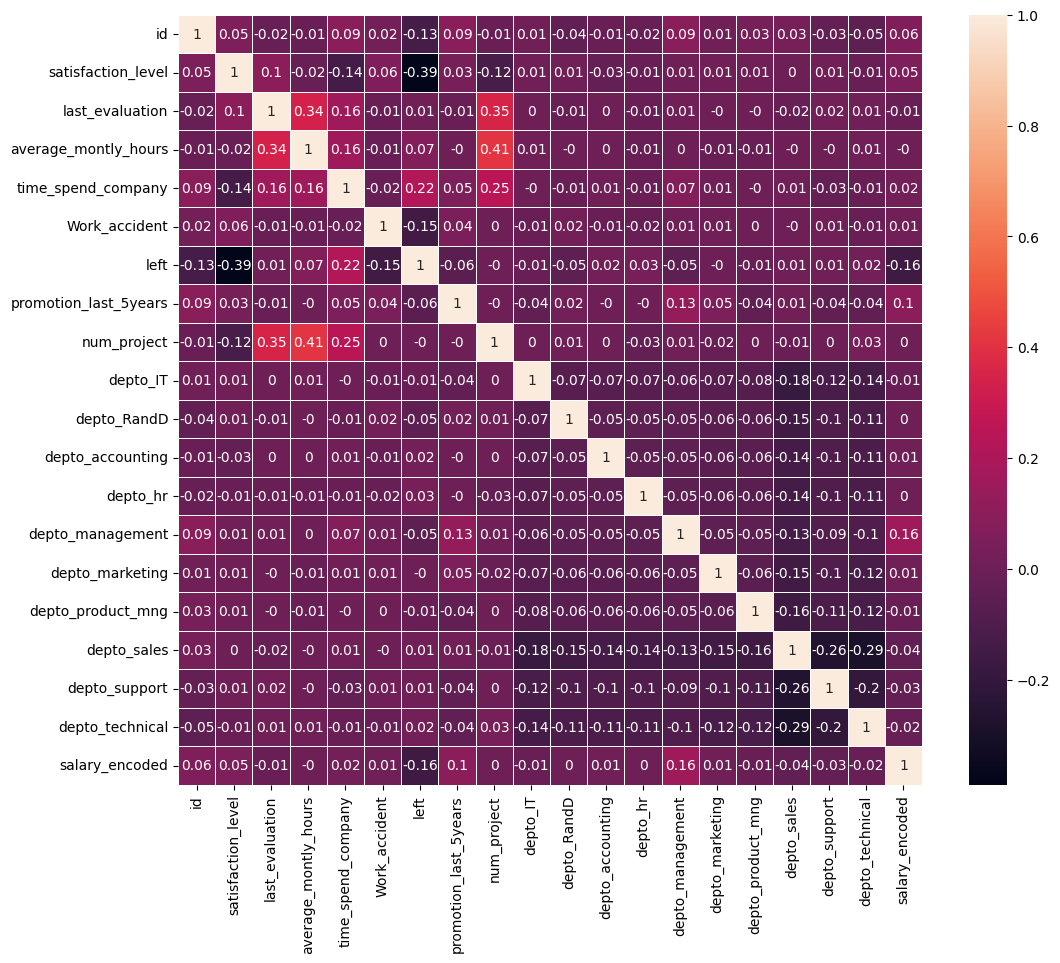

In [7]:
from matplotlib import pyplot as plt
correlation_matrix = dados_coeded.corr().round(2)

fig, ax = plt.subplots(figsize=(12,10))
sb.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

Será que quanto menor o nível de satisfação mais pessoas deixam a empresa

In [ ]:
dados_coeded.left.value_counts()

,count
left,
0,11428
1,3571


[Text(0, 0.5, 'nível de satisfação')]

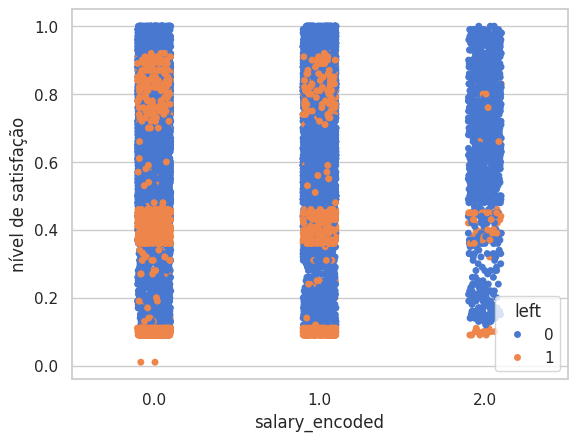

In [8]:
sb.set_theme(style='whitegrid', palette='muted')
ax = sb.stripplot(data=dados_coeded, x='salary_encoded', y='satisfaction_level',hue='left')
ax.set( ylabel='nível de satisfação')

Podemos obserar que o nível de satisfação e salário podem influenciar sim na decisão de deixar a empresa, pois temos uma menor concentração de pessoas que deixaram a empresa nas pessoas com maior salário.

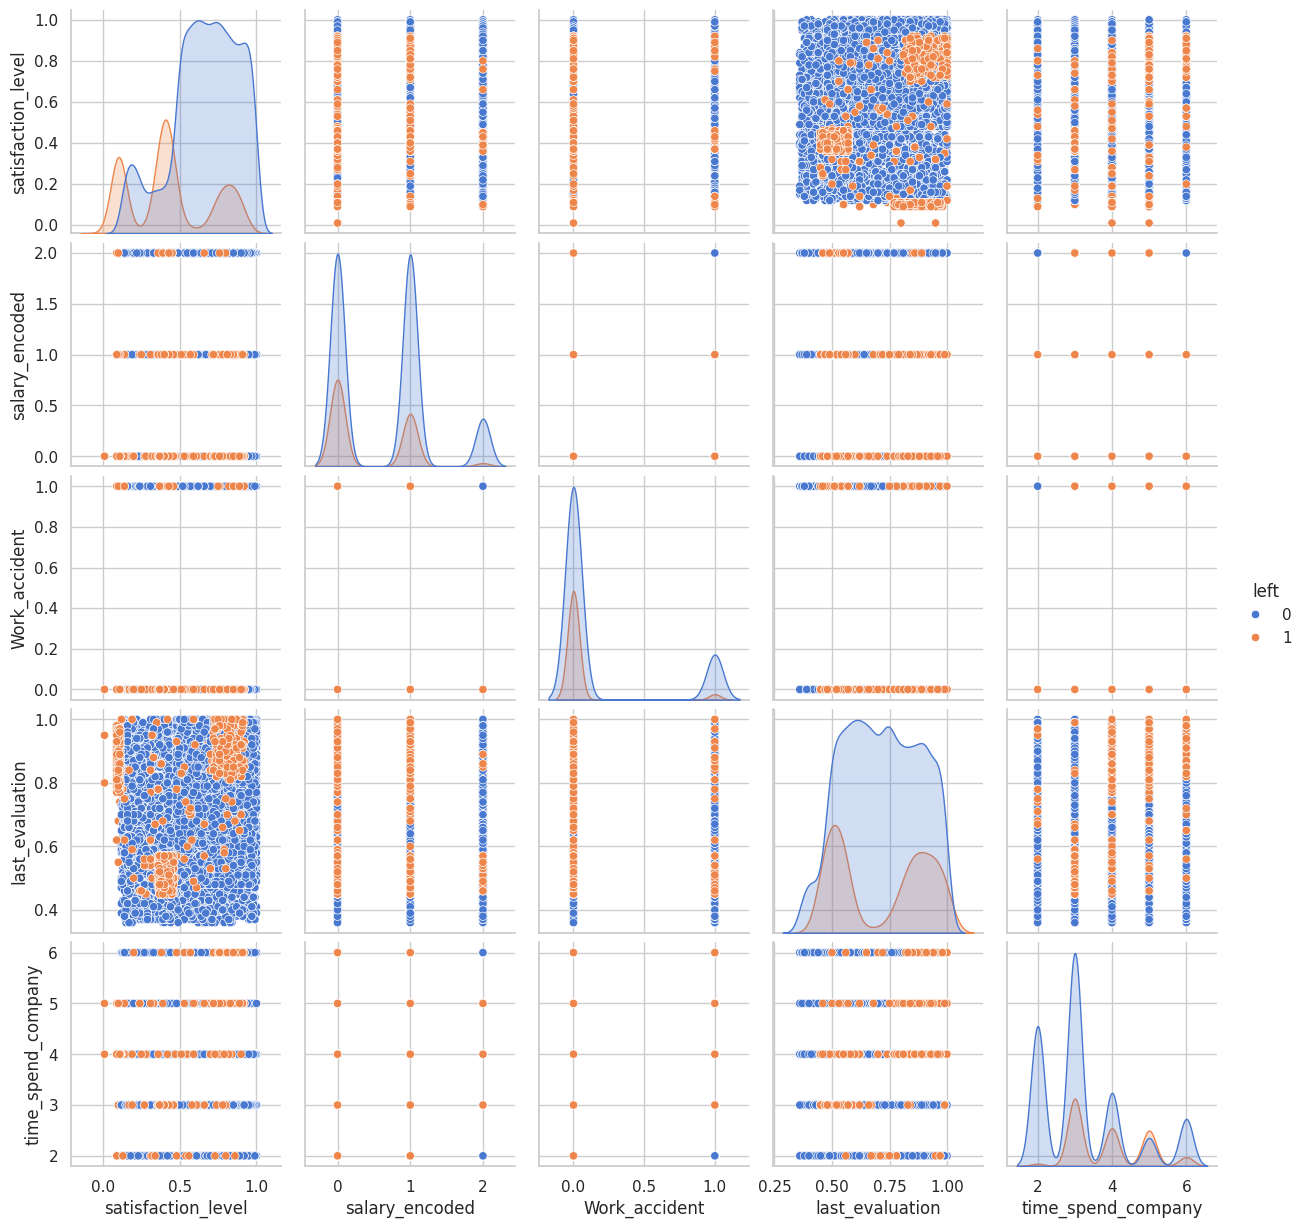

In [ ]:
sb.pairplot(dados_coeded, vars=['satisfaction_level','salary_encoded','Work_accident','last_evaluation','time_spend_company'],hue='left')

<Axes: xlabel='left', ylabel='satisfaction_level'>

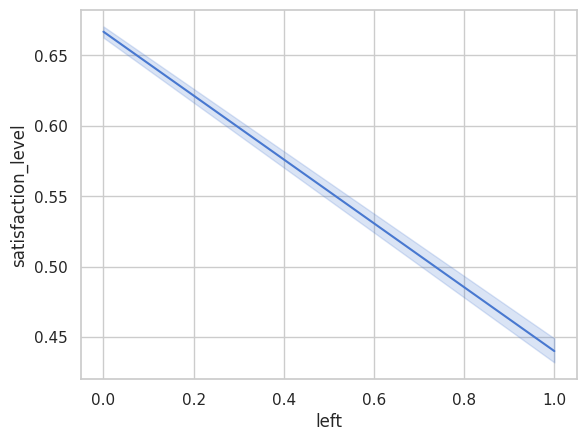

In [ ]:
sb.lineplot(data=dados_coeded, x='left', y='satisfaction_level')

<Axes: xlabel='left', ylabel='salary_encoded'>

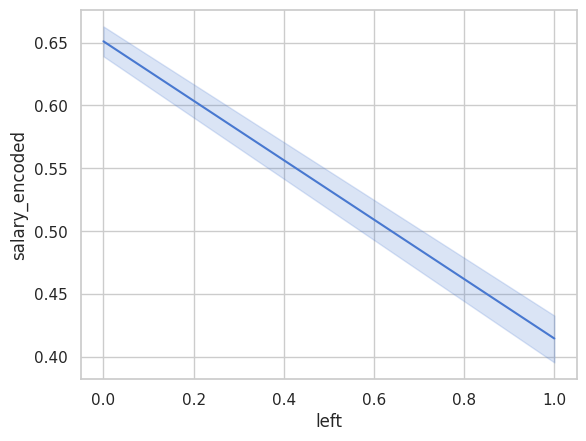

In [ ]:
sb.lineplot(data=dados_coeded, x='left', y='salary_encoded')

Avaliando os gráficos de linha podemos ver que pessoas com menor nível de satisfação e menor salário tendem a deixar a empresa.

Vamos usar um algoritmo supersiosionado nesse caso para a variável target 'left'

Vamos utilizar o KNN
vamos utilizar uma técnica (menor erro médio) para descobrir qual o melhor valor do hiperparâmetro n_neighbors

Text(0, 0.5, 'Mean Error')

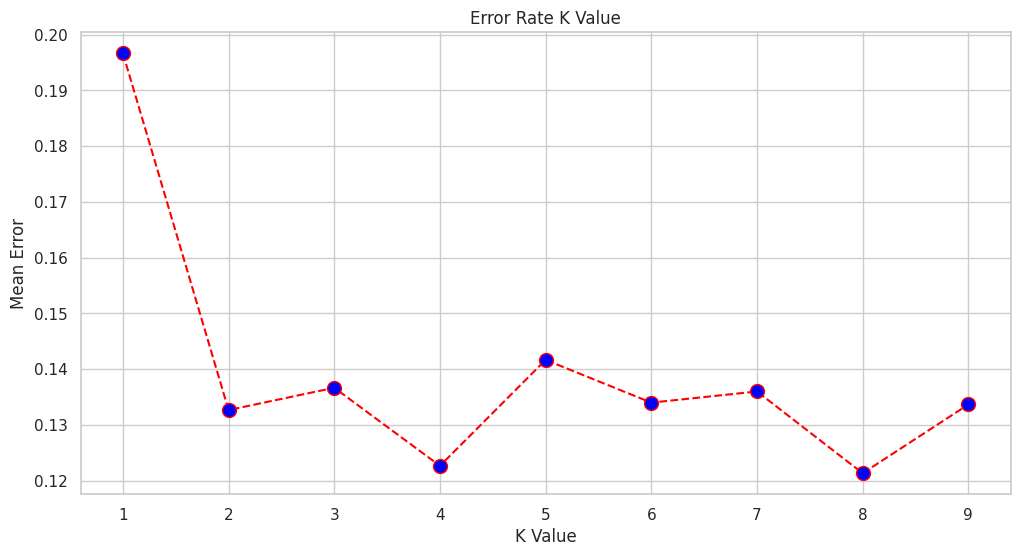

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

x = dados_coeded[['salary_encoded','satisfaction_level']]
y = dados_coeded['left']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

std = StandardScaler()

x_train_scaled = std.fit_transform(x_train)
x_test_scaled = std.transform(x_test)

error = []

# Calculating error for K values between 1 and 10
for i in range(1, 10): #range de tentativas para k
    knn = KNeighborsClassifier(n_neighbors=i)# aqui definimos  o k
    knn.fit(x_train_scaled, y_train) #treinando o algoritmo para encontrar o erro
    pred_i = knn.predict(x_test_scaled) #armazenando as previsões
    error.append(np.mean(pred_i != y_test)) #armazenando o valor do erro médio na lista de erros


plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Analisando o gráfico podemos ver que 4 parece a quantidade que gera menos erros

In [10]:
modelo_classificador = KNeighborsClassifier(n_neighbors=4)
modelo_classificador.fit(x_train_scaled, y_train)
y_predito = modelo_classificador.predict(x_test_scaled)
y_predito

array([0, 0, 1, ..., 0, 0, 0])

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predito)

0.8773333333333333

Vamos testar alguns outros algoritmos para comparar a precisão

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

svm = Pipeline([
    ("linear_svc", LinearSVC(C=1))
])

svm.fit(x_train_scaled, y_train)

y_predito_svm = svm.predict(x_test_scaled)

print(accuracy_score(y_test, y_predito_svm))


0.792


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

rf = RandomForestClassifier(random_state=7)
rf.fit(x_train_scaled, y_train)
y_predito_rf = rf.predict(x_test_scaled)
print(accuracy_score(y_test, y_predito_rf))

0.893


Parece que o RandomForest se mostrou um pouco melhor que os outros dois

Vamos utilizar o método de validação cruzada para validar qual o melhor algoritmo para o nosso problema

In [ ]:
kfold = KFold(n_splits=10, shuffle=True)

knn_results = cross_val_score(knn, x,y,cv=kfold)
svm_results = cross_val_score(svm, x,y,cv=kfold)
rf_results = cross_val_score(rf, x,y,cv=kfold)

dic_models = {
    "KNN":knn_results.mean(),
    "SVM":svm_results.mean(),
    "RF":rf_results.mean()
}

melhor_modelo = max(dic_models, key=dic_models.get)
print("KNN (R^2): {0}\nSVM (R^2): {1}\nRandom Forest (R^2): {2}".format(knn_results.mean(), svm_results.mean(), rf_results.mean()))
print("O melhor modelo é : {0} com o valor: {1}".format(melhor_modelo, dic_models[melhor_modelo]))

KNN (R^2): 0.7517831887925284
SVM (R^2): 0.7865195908383367
Random Forest (R^2): 0.894258527907494
O melhor modelo é : RF com o valor: 0.894258527907494
